In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline 

pd.set_option('display.max_columns', None)

train = pd.read_csv("E:/bp2/ml/ml-titanic/train.csv")
test  = pd.read_csv("E:/bp2/ml/ml-titanic/test.csv")
sub = pd.read_csv("E:/bp2/ml/ml-titanic/submission.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
train = train.drop('Name', 1);

In [7]:
test = test.drop('Name', 1);

In [9]:
train = train.drop('Cabin', 1);
test = test.drop('Cabin', 1);

In [11]:
train = train.drop('Ticket', 1);
test = test.drop('Ticket', 1);

In [12]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [15]:
from sklearn.preprocessing import LabelEncoder
Genderlabelencoder = LabelEncoder()
train['Sex'] = Genderlabelencoder.fit_transform(train['Sex'])
test['Sex'] = Genderlabelencoder.fit_transform(test['Sex'])

In [17]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [18]:
train['Embarked'] = train['Embarked'].fillna("N")
test['Embarked'] = test['Embarked'].fillna("N")

In [19]:
Embarkedlabelencoder = LabelEncoder()
train['Embarked'] = Embarkedlabelencoder.fit_transform(train['Embarked'])
test['Embarked'] = Embarkedlabelencoder.fit_transform(test['Embarked'])

In [20]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,3
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,3
3,4,1,1,0,35.0,1,0,53.1000,3
4,5,0,3,1,35.0,0,0,8.0500,3


In [26]:
AgeMode=train.mode()['Age'][0]

In [27]:
train['Age'] = train['Age'].fillna(AgeMode)
test['Age'] = test['Age'].fillna(AgeMode)

In [32]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,3
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,3
3,4,1,1,0,35.0,1,0,53.1000,3
4,5,0,3,1,35.0,0,0,8.0500,3


In [29]:
Y = train['Survived'].values


In [34]:
train_df = train.drop(['PassengerId','Survived'], axis=1)


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score as roc
X_train, X_test, y_train, y_test = train_test_split(train_df, Y,test_size=0.2, random_state=0, stratify=Y)

In [78]:
X_train.shape, X_test.shape

((712, 7), (179, 7))

In [47]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [79]:
import lightgbm as lgb

model = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', 
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, 
                                   subsample = 0.8, n_jobs = -1, random_state = 50)

In [80]:

lgb_mod=model.fit(X_train, y_train, eval_metric = 'auc',
                  eval_set = [(X_test, y_test), (X_train, y_train)],
                  early_stopping_rounds = 100, verbose = 200)

Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[88]	training's auc: 0.963103	training's binary_logloss: 0.273391	valid_0's auc: 0.835441	valid_0's binary_logloss: 0.474919


In [81]:
lgb_pred=lgb_mod.predict(X_test)

In [82]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(y_true=y_test,
                   y_pred=lgb_pred)

0.2122905027932961

In [83]:
mean_absolute_error(y_true=y_test,
                   y_pred=lgb_pred)

0.2122905027932961

In [ ]:
#Trying using XGBOOST Model

In [51]:

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
from xgboost import XGBClassifier
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import time

In [52]:

xgb=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bytree=0.8, gamma=1.5, learning_rate=0.05, max_delta_step=0, max_depth=3, min_child_weight=7, missing=None, n_estimators=200, n_jobs=-1, nthread=None, objective='binary:logistic', random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=True, subsample=0.6)

In [55]:

reg=xgb.fit(X_train,y_train)

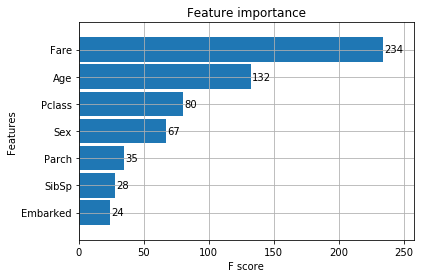

In [57]:
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
_ = plot_importance(reg, height=0.9)

In [58]:
X_test['pred_survived'] = reg.predict(X_test)

C:\Users\hi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
y_test_df=pd.DataFrame(y_test, columns=['actual_survived']) 

In [69]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mean_squared_error(y_true=y_test,
                   y_pred=X_test['pred_survived'])

0.2122905027932961

In [71]:
mean_absolute_error(y_true=y_test,
                   y_pred=X_test['pred_survived'])

0.2122905027932961

In [85]:
PassengerId_test = test['PassengerId'].values

In [86]:
test_df = test.drop(['PassengerId'], axis=1)

In [87]:
pred=reg.predict(test_df)


In [88]:
sub['target']=pred
sub.to_csv('E:/bp2/ml/ml-titanic/xgb_op.csv',index=False)